In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Input, Dense
from tensorflow.keras.optimizers import RMSprop,Adam,Adadelta
from tensorflow.keras.utils import to_categorical
import cv2
import os
from sklearn.utils import shuffle

In [2]:
dataset_path = "C:\\Users\\ASLAM\\Desktop\\Bootcamp\\Day6\\digits"  

images = []
labels = []

for digit in range(10):
    folder_path = os.path.join("C:\\Users\\ASLAM\\Desktop\\Bootcamp\\Day6\\digits", str(digit))
    
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        if img is None:
            print(f"Skipping corrupt image: {img_path}")
            continue
        
        img = cv2.resize(img, (28, 28))  
        img = img / 255.0  
        images.append(img)
        labels.append(digit)


X = np.array(images).reshape(-1, 28*28)  
y = to_categorical(labels, num_classes=10)  

print(X.shape)  
print(y.shape)


(10160, 784)
(10160, 10)


In [3]:
X, y = shuffle(X, y, random_state=42)

In [4]:
model = Sequential([
    Dense(10, activation='softmax', input_shape=(784,))  
])

c:\Users\ASLAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer=Adadelta(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
history_adadelta=model.fit(X,y,epochs=20,validation_split=0.2)


Epoch 1/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1269 - loss: 2.5046 - val_accuracy: 0.2037 - val_loss: 2.2106
Epoch 2/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2257 - loss: 2.1625 - val_accuracy: 0.2913 - val_loss: 2.0797
Epoch 3/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3270 - loss: 2.0376 - val_accuracy: 0.3947 - val_loss: 1.9726
Epoch 4/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4171 - loss: 1.9474 - val_accuracy: 0.4828 - val_loss: 1.8731
Epoch 5/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5081 - loss: 1.8501 - val_accuracy: 0.5595 - val_loss: 1.7796
Epoch 6/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5743 - loss: 1.7638 - val_accuracy: 0.6171 - val_loss: 1.6920
Epoch 7/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6414 - loss: 1.6652 - val_accuracy: 0.6673 - val_loss: 1.6096
Epoch 8/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6782 - loss: 1.5915 - val_accuracy: 0.

In [6]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history_adam=model.fit(X,y,epochs=20,validation_split=0.2)


Epoch 1/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8507 - loss: 0.7258 - val_accuracy: 0.8996 - val_loss: 0.3852
Epoch 2/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9101 - loss: 0.3643 - val_accuracy: 0.9144 - val_loss: 0.3039
Epoch 3/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9234 - loss: 0.2912 - val_accuracy: 0.9321 - val_loss: 0.2439
Epoch 4/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9314 - loss: 0.2588 - val_accuracy: 0.9336 - val_loss: 0.2317
Epoch 5/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9354 - loss: 0.2235 - val_accuracy: 0.9469 - val_loss: 0.1878
Epoch 6/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9496 - loss: 0.1911 - val_accuracy: 0.9444 - val_loss: 0.1811
Epoch 7/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9479 - loss: 0.1930 - val_accuracy: 0.9429 - val_loss: 0.1892
Epoch 8/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9524 - loss: 0.1690 - val_accuracy: 0.

Text(0.5, 1.0, 'Loss Comparision')

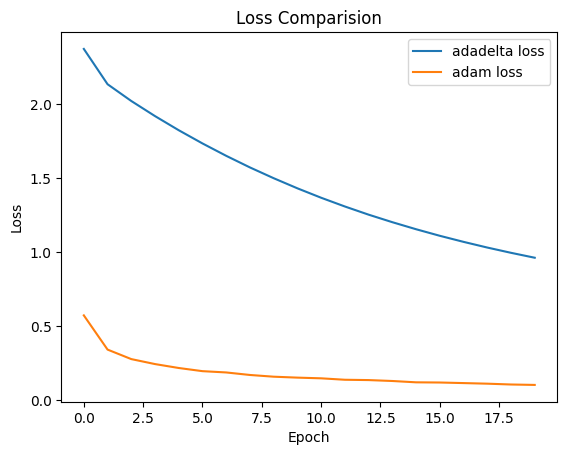

In [10]:
plt.plot(history_adadelta.history['loss'],label='adadelta loss')
plt.plot(history_adam.history['loss'],label='adam loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Comparision')

Text(0.5, 1.0, 'Accuracy Comparison')

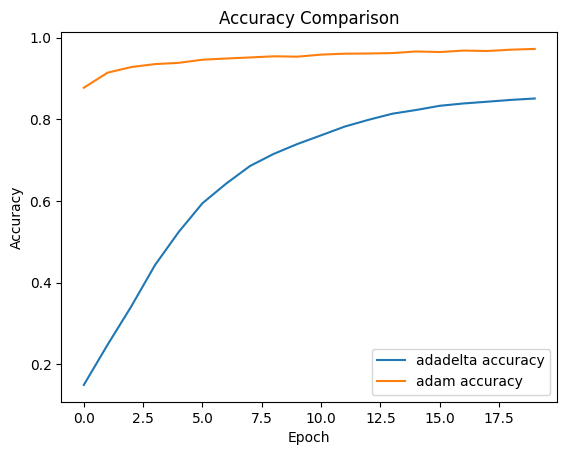

In [8]:
plt.plot(history_adadelta.history['accuracy'],label='adadelta accuracy')
plt.plot(history_adam.history['accuracy'],label='adam accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Comparison') 